# Introduction

- Unsupervised learning
- Similar datapoints end up in the same cluster
- Finds natural groups in the feature space

In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [8]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=21)

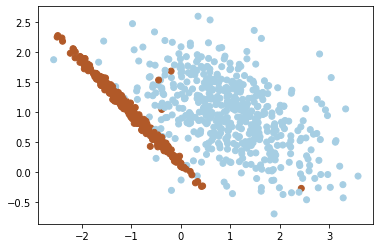

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

## 1) Affinity Propagation

### How it works:

Consider this dataset:
<img src="dataset.png">

#### a) Calculate Similarity Matrix

For this, take the sum of squared differences between each feature of two people, and change its sign. Example: For Alice and Bob:

<br>
$SimilarityMatrix(Alice, Bob) = -((3-4)^2 + (4-3)^2 + (3-5)^2 + (2-1)^2 + (1-1)^2)$<br>
$SimilarityMatrix(Alice, Bob) = -(7)$


Do this for every other pair, you'll end up with this:

<img src="similarity matrix 1.png">

Replace zeros with the minimum element of the matrix, in this case, -22:

<img src="similarity matrix 2.png">

#### b) Responsibility Matrix

For this, use this formula, if S represents Similarity Matrix and R represents Responsibility Matrix, then for Bob(column) to Alice(row) is $SimilarityMatrix(Alice, Bob)$ minus the maximum Similarity element in Alice's row, i.e. -6:

$R[Alice, Bob] = S[Alice, Bob] - (-6)$<br>
$R[Alice, Bob] = -7 + 6$<br>
$R[Alice, Bob] = -1$<br>

Do this for every other pair.

<img src="responsibility matrix.png">

#### c) Availability Matrix

In this steps, we'll use two different formulas for updating the diagonal and non-diagnoal elements of the Availability Matrix

1. Diagonal Elements ((Alice, Alice), (Bob, Bob), etc.)

For these, simply add up the non-negative elements in the person's column. In case of Alice, it will be:

$AvailabilityMatrix(Alice, Alice) = 0 + 10 + 11 + 0 + 0$
$AvailabilityMatrix(Alice, Alice) = 21$

Calculate the same for all other people

These elements are called **Self-Responsibilities**

2. Non-Diagonal Elements ((Alice, Bob), (Alice, Edna), etc)

For these, if we're talking about Alice(row) and Bob(column), the calculation is Bob's Self-Responsibility plus the sum of all non-negative entries in Bob's column, i.e.:

$AvailabilityMatrix(Alice, Bob) = SelfResponsibility(Bob) + 0$

as there aren't any non-negative elements in Bob's column, so

$AvailabilityMatrix(Alice, Bob) = ResponsibilityMatrix(Bob, Bob)$
$AvailabilityMatrix(Alice, Bob) = -15$

Again, do this for all the other pairs, we'll end up with:

<img src="availability matrix.png">

#### d) Criterion Matrix

Simply add elements in Responsibility Matrix and Availability Matrix to end up with:

<img src="criterion matrix.png">

**IMPORTANT NOTE:** Features must be normalized before using Affinity Propagation 

In [13]:
from sklearn.cluster import AffinityPropagation

Total 26 classes:


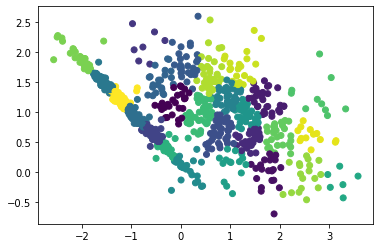

In [18]:
model = AffinityPropagation(damping=0.9)
model.fit(X, y)
preds = model.predict(X)

print(f'Total {np.unique(preds).shape[0]} classes:')

plt.scatter(X[:, 0], X[:, 1], c=preds);

## 2) Agglomerative Clustering

- Part of hierarchical clustering

Goes like this:

- Consider each datapoint as a cluster
- Merge the two closest clusters
- Keep merging until there's only one cluster remaining

In [19]:
from sklearn.cluster import AgglomerativeClustering

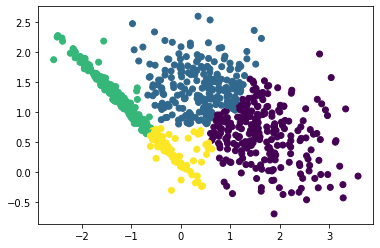

In [25]:
model = AgglomerativeClustering(n_clusters=4)
preds = model.fit_predict(X, y)

plt.scatter(X[:, 0], X[:, 1], c=preds);

# References

- https://machinelearningmastery.com/clustering-algorithms-with-python/
- https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8